<a href="https://colab.research.google.com/github/laksh262001/Deeplearning-and-AI/blob/main/AutoregressiveModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

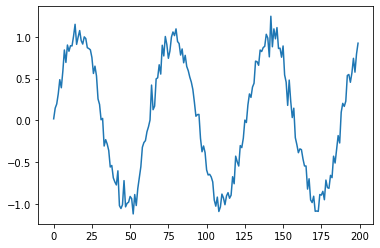

In [19]:
series = np.sin(0.1*np.arange(200)) +np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [20]:
# Build dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


X.shape (190, 10) Y.shape (190,)


In [21]:
# Autoregression linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1),)

# Train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 59ms/step - loss: 0.5092 - val_loss: 0.3655
Epoch 2/80
3/3 [==============================] - 0s 23ms/step - loss: 0.2558 - val_loss: 0.1129
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1488 - val_loss: 0.0847
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0811 - val_loss: 0.0643
Epoch 5/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0912 - val_loss: 0.0533
Epoch 6/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0547 - val_loss: 0.0786
Epoch 7/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0911 - val_loss: 0.0695
Epoch 8/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0585 - val_loss: 0.0494
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0591 - val_loss: 0.0274
Epoch 10/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0369 - val_loss: 0.0310
Epoch 11/80
3/3 [=======================

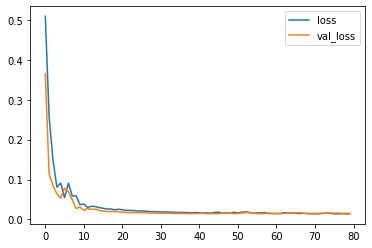

In [22]:
import matplotlib.pyplot as plot
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [23]:
# Wrong forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

#index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1

  #update the predictions list
  validation_predictions.append(p)
  

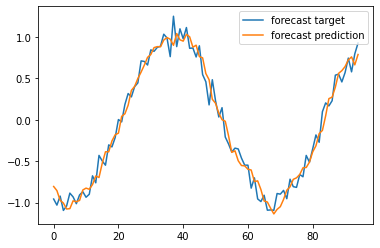

In [24]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [25]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p 

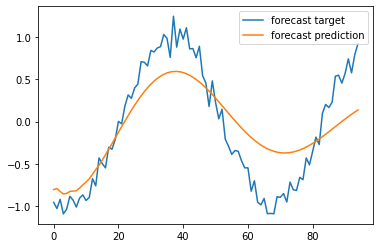

In [26]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()